### Energy Usage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings # 0 warnings :)
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
from sklearn.metrics.pairwise import cosine_similarity

### Set to True to update all the pics in the /Figure folder
downloadPic = True
# to-use:
# if (downloadPic):
#     plt.savefig ('Figure/nameOfPic.png')

#### Data Import

In [2]:
df = pd.read_csv('electricity.csv')
df.head(2)

,Utility.Number,Utility.Name,Utility.State,Utility.Type,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,...,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales,Retail.Total.Customers
0,55,City of Aberdeen - (MS),MS,Municipal,32.7,30.7,0.0,204875.0,0.0,204875.0,...,661.0,6025.0,118989.0,2.0,0.0,0.0,0.0,14649.0,198442.0,3258.0
1,59,City of Abbeville - (LA),LA,Municipal,31.4,22.9,0.0,137537.0,0.0,137537.0,...,1032.0,3211.8,37566.0,27.0,0.0,0.0,0.0,12574.4,127849.0,5523.0


#### Cleaning Data

In [3]:
print('The initial dataframe size is: %d' % df.size)

The initial dataframe size is: 80408


In [4]:
# remove duplicates
df.drop_duplicates()
# drop rows containing na values
df = df.dropna()
print('After cleaning, the size is: %d' % df.size)

After cleaning, the size is: 80370


#### Convert column(s) to appropriate data types

In [5]:
# df.dtypes

In [6]:
df['Utility.State'] = df['Utility.State'].astype('category')
df['Utility.Type'] = df['Utility.Type'].astype('category')
df.dtypes

Utility.Number                        int64
Utility.Name                         object
Utility.State                      category
Utility.Type                       category
Demand.Summer Peak                  float64
Demand.Winter Peak                  float64
Sources.Generation                  float64
Sources.Purchased                   float64
Sources.Other                       float64
Sources.Total                       float64
Uses.Retail                         float64
Uses.Resale                         float64
Uses.No Charge                      float64
Uses.Consumed                       float64
Uses.Losses                         float64
Uses.Total                          float64
Revenues.Retail                     float64
Revenue.Delivery                    float64
Revenue.Resale                      float64
Revenue.Adjustments                 float64
Revenue.Transmission                float64
Revenue.Other                       float64
Revenue.Total                   

#### Rename some columns to remove the space

In [7]:
df = df.rename(columns={'Demand.Summer Peak': 'Demand.SummerPeak', 'Demand.Winter Peak': 'Demand.WinterPeak', 'Uses.No Charge':'Uses.NoCharge'})
list(df.columns)

['Utility.Number',
 'Utility.Name',
 'Utility.State',
 'Utility.Type',
 'Demand.SummerPeak',
 'Demand.WinterPeak',
 'Sources.Generation',
 'Sources.Purchased',
 'Sources.Other',
 'Sources.Total',
 'Uses.Retail',
 'Uses.Resale',
 'Uses.NoCharge',
 'Uses.Consumed',
 'Uses.Losses',
 'Uses.Total',
 'Revenues.Retail',
 'Revenue.Delivery',
 'Revenue.Resale',
 'Revenue.Adjustments',
 'Revenue.Transmission',
 'Revenue.Other',
 'Revenue.Total',
 'Retail.Residential.Revenue',
 'Retail.Residential.Sales',
 'Retail.Residential.Customers',
 'Retail.Commercial.Revenue',
 'Retail.Commercial.Sales',
 'Retail.Commercial.Customers',
 'Retail.Industrial.Revenue',
 'Retail.Industrial.Sales',
 'Retail.Industrial.Customers',
 'Retail.Transportation.Revenue',
 'Retail.Transportation.Sales',
 'Retail.Transportation.Customers',
 'Retail.Total.Revenue',
 'Retail.Total.Sales',
 'Retail.Total.Customers']

### Compare Summer Peak Demand and Winter Peak Demand

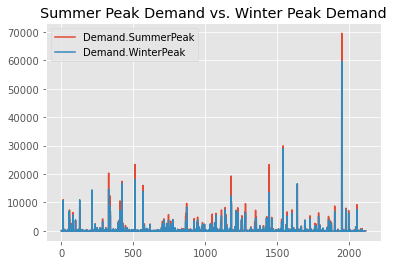

In [8]:
### Plot the Summer Peak and Winter Peak on one graph
fig0 = df[['Demand.SummerPeak','Demand.WinterPeak']].plot.line(title = "Summer Peak Demand vs. Winter Peak Demand")
fig0
if (downloadPic):
    plt.savefig ('Figure/summerWinterPeak.png') # not now

In [9]:
print("There are %d utilities where the summer peak is greater than winter peak." % df[df['Demand.SummerPeak'] > df['Demand.WinterPeak']].size)
print("There are %d utilities where the summer peak is equal to winter peak." % df[df['Demand.SummerPeak'] == df['Demand.WinterPeak']][df['Demand.SummerPeak'] != 0].size)
print("There are %d utilities where the summer peak is lower than winter peak." % df[df['Demand.SummerPeak'] < df['Demand.WinterPeak']].size)

There are 45296 utilities where the summer peak is greater than winter peak.
There are 836 utilities where the summer peak is equal to winter peak.
There are 26068 utilities where the summer peak is lower than winter peak.


### Generation of Power by State and Utility Type

In [10]:
pwr_generated = pd.pivot_table(df, values=['Sources.Total'], index=['Utility.State'], columns=['Utility.Type'], aggfunc='sum').fillna(0)
pwr_generated.head(3)

Sources.Total                                          \
Utility.Type  Behind the Meter Community Choice Aggregator Cooperative   
Utility.State                                                            
AK                         0.0                         0.0   4518506.0   
AL                         0.0                         0.0  11583544.0   
AR                         0.0                         0.0  13014097.0   

                                                                        \
Utility.Type  Federal Investor Owned   Municipal Political Subdivision   
Utility.State                                                            
AK                0.0       498375.0   1899550.0                   0.0   
AL                0.0     66545519.0  16360950.0                   0.0   
AR                0.0     31248886.0   6420696.0                   0.0   

                                                                    
Utility.Type  Retail Power Marketer State Wholesale Power Marketer  
Utility.State                                                       
AK                              0.0   0.0                      0.0  
AL                              0.0   0.0                      0.0  
AR                        5031891.0   0.0                      0.0

In [11]:
pwr_generated_tot = df[['Sources.Total','Utility.State']].groupby('Utility.State').sum()
pwr_generated_tot.reset_index(inplace=True)
pwr_generated_tot = pwr_generated_tot.rename(columns={'Sources.Total': 'Total Generation of Power (MWh)', 'Utility.State':'Utility by State'})
pwr_generated_tot.head(3)

,Utility by State,Total Generation of Power (MWh)
0,AK,6916431.0
1,AL,94490013.0
2,AR,55715570.0


In [12]:
# figure(figsize=(8, 10), dpi=80)
# fig1 = sns.barplot(data = pwr_generated_tot, y = 'Utility by State' ,x = 'Total Generation of Power (MWh)')
# fig1.axes.set_title('Total Generation of Power (MWh) by State', fontsize=20)
# fig1 (see the descending one) (below)
# plt.savefig ('Figure/totGenByState.png') # not now

In [13]:
desc_pwr_generated_tot = pwr_generated_tot.sort_values(by='Total Generation of Power (MWh)', ascending=False).reset_index(drop=True)
desc_pwr_generated_tot.head(3)

,Utility by State,Total Generation of Power (MWh)
0,TX,773840664.0
1,MD,514494283.0
2,CA,324458359.0


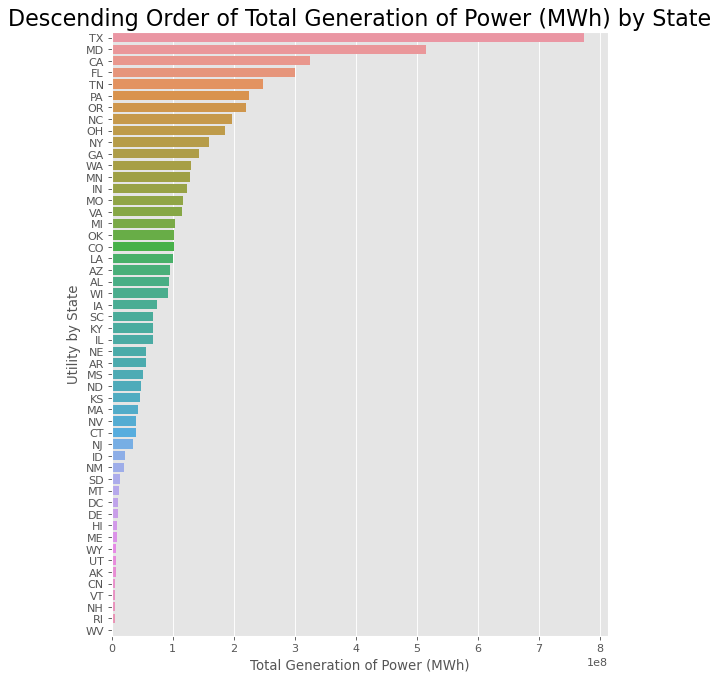

In [14]:
figure(figsize=(8, 10), dpi=80)
fig2 = sns.barplot(data = desc_pwr_generated_tot, y='Utility by State', x='Total Generation of Power (MWh)', order=desc_pwr_generated_tot[desc_pwr_generated_tot.sort_values(by='Total Generation of Power (MWh)', ascending=False).columns[0]])
fig2.axes.set_title('Descending Order of Total Generation of Power (MWh) by State', fontsize=20)
fig2
if (downloadPic):
    plt.savefig ('Figure/totGenByState.png') # not now

In [15]:
revenue = pd.pivot_table(df, values=['Revenue.Total'], index=['Utility.State'], columns=['Utility.Type'], aggfunc='sum').fillna(0)
revenue.head(3)

Revenue.Total                                          \
Utility.Type  Behind the Meter Community Choice Aggregator Cooperative   
Utility.State                                                            
AK                         0.0                         0.0    833097.4   
AL                         0.0                         0.0   1260212.1   
AR                         0.0                         0.0   1252673.1   

                                                                       \
Utility.Type  Federal Investor Owned  Municipal Political Subdivision   
Utility.State                                                           
AK                0.0        62338.6   265592.7                   0.0   
AL                0.0      6039394.0  1528590.4                   0.0   
AR                0.0      2125292.8   480709.2                   0.0   

                                                                    
Utility.Type  Retail Power Marketer State Wholesale Power Marketer  
Utility.State                                                       
AK                              0.0   0.0                      0.0  
AL                              0.0   0.0                      0.0  
AR                         257955.8   0.0                      0.0

In [16]:
revenue_tot = df[['Revenue.Total','Utility.State']].groupby('Utility.State').sum()
revenue_tot.reset_index(inplace=True)
revenue_tot = revenue_tot.rename(columns={'Revenue.Total': 'Total Revenue (Thousand of US dollars)', 'Utility.State':'Utility by State'})
revenue_tot.head(3)

,Utility by State,Total Revenue (Thousand of US dollars)
0,AK,1161028.7
1,AL,8828196.5
2,AR,4116630.9


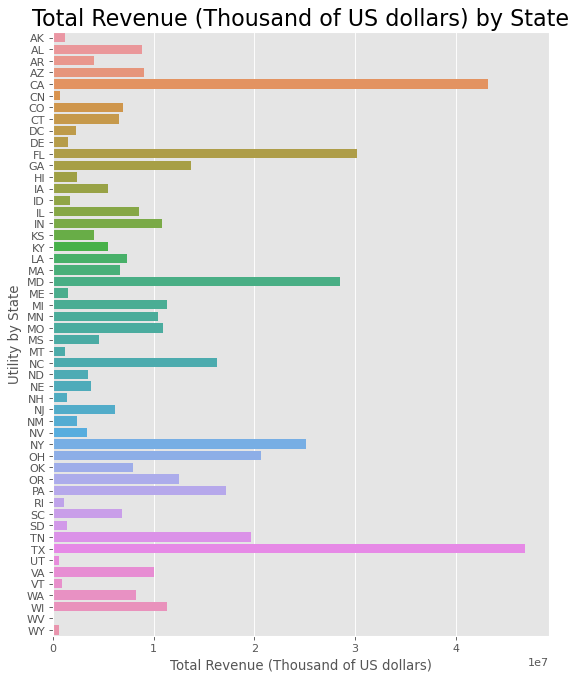

In [17]:
figure(figsize=(8, 10), dpi=80)
fig3 = sns.barplot(data = revenue_tot, y = 'Utility by State' ,x = 'Total Revenue (Thousand of US dollars)')
fig3.axes.set_title('Total Revenue (Thousand of US dollars) by State', fontsize=20)
fig3
if (downloadPic):
    plt.savefig ('Figure/totRevenueByState.png') # not now

In [18]:
use_loss = pd.pivot_table(df, values=['Uses.Losses'], index=['Utility.State'], columns=['Utility.Type'], aggfunc='sum').fillna(0)
use_loss.head(3)

Uses.Losses                                          \
Utility.Type  Behind the Meter Community Choice Aggregator Cooperative   
Utility.State                                                            
AK                         0.0                         0.0    287652.0   
AL                         0.0                         0.0    575125.0   
AR                         0.0                         0.0    582760.0   

                                                                      \
Utility.Type  Federal Investor Owned Municipal Political Subdivision   
Utility.State                                                          
AK                0.0        16610.0   52823.0                   0.0   
AL                0.0      3128158.0  745066.0                   0.0   
AR                0.0      1976461.0  228749.0                   0.0   

                                                                    
Utility.Type  Retail Power Marketer State Wholesale Power Marketer  
Utility.State                                                       
AK                              0.0   0.0                      0.0  
AL                              0.0   0.0                      0.0  
AR                         280451.0   0.0                      0.0

In [19]:
use_loss_tot = df[['Uses.Losses','Utility.State']].groupby('Utility.State').sum()
use_loss_tot.reset_index(inplace=True)
use_loss_tot = use_loss_tot.rename(columns={'Uses.Losses': 'Power losses of all kinds measured in megawatt hours', 'Utility.State':'Utility by State'})
use_loss_tot.head(3)

,Utility by State,Power losses of all kinds measured in megawatt hours
0,AK,357085.0
1,AL,4448349.0
2,AR,3068421.0


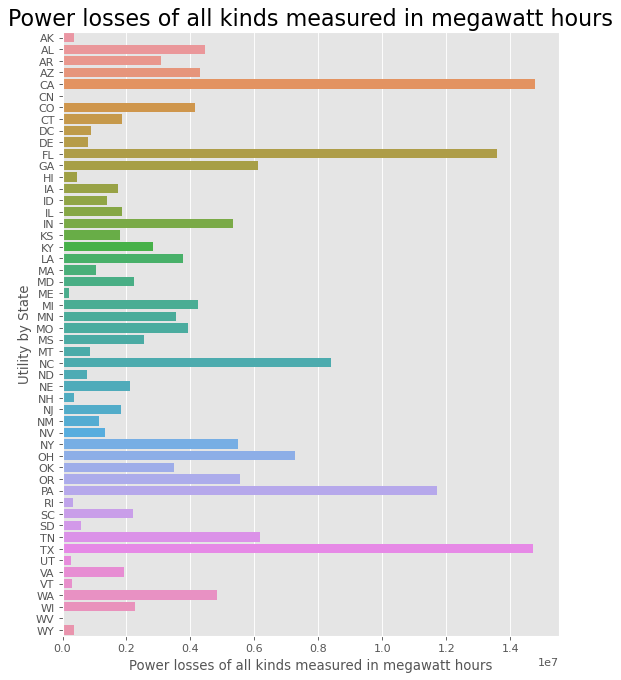

In [20]:
figure(figsize=(8, 10), dpi=80)
fig4 = sns.barplot(data = use_loss_tot, y = 'Utility by State' ,x = 'Power losses of all kinds measured in megawatt hours')
fig4.axes.set_title('Power losses of all kinds measured in megawatt hours', fontsize=20)
fig4
if (downloadPic):
    plt.savefig ('Figure/powerLossAllKinds.png') # not now

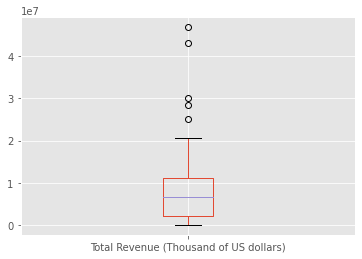

In [21]:
revenue_tot.boxplot(column = "Total Revenue (Thousand of US dollars)")
if (downloadPic):
    plt.savefig ('Figure/totRevenue.png') # not now

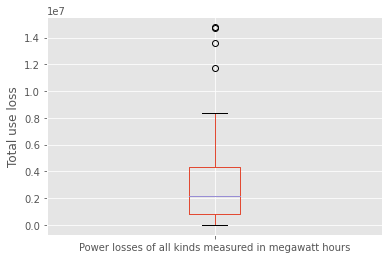

In [22]:
ax = use_loss_tot.boxplot()
ax.set_ylabel("Total use loss")
if (downloadPic):
    plt.savefig ('Figure/totUseLoss.png') # not now

### Total Generation of Power (MWh) by Utility Type

In [23]:
pwr_generated_type_tot = df[['Sources.Total','Utility.Type']].groupby('Utility.Type').sum()
pwr_generated_type_tot.reset_index(inplace=True)
pwr_generated_type_tot = pwr_generated_type_tot.rename(columns={'Sources.Total': 'Total Generation of Power (MWh)', 'Utility.Type':'Utility by Type'})
pwr_generated_type_tot.head(3)

,Utility by Type,Total Generation of Power (MWh)
0,Behind the Meter,6151714.0
1,Community Choice Aggregator,11826361.0
2,Cooperative,494085488.0


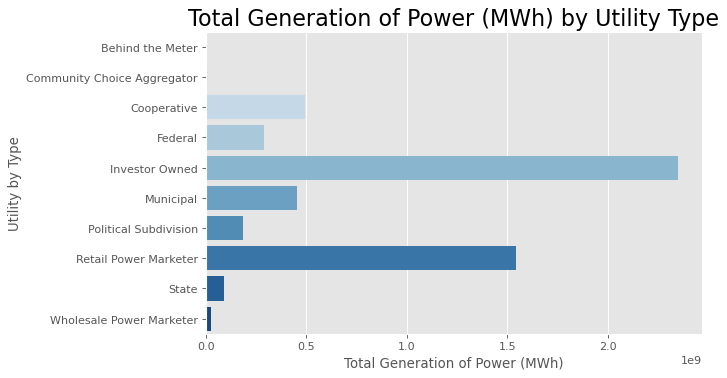

In [24]:
# fig2_order = pwr_generated_type_tot.sort_values(by='Total Generation of Power (MWh)').index.values # not working, FIXME
figure(figsize=(8, 5), dpi=80)
fig2 = sns.barplot(data = pwr_generated_type_tot, y = 'Utility by Type' ,x = 'Total Generation of Power (MWh)', palette = "Blues")
fig2.axes.set_title('Total Generation of Power (MWh) by Utility Type', fontsize=20)
fig2
if (downloadPic):
    plt.savefig ('Figure/totGenByUType.png') # not now

### Peak Demand (Summer) vs. Generation

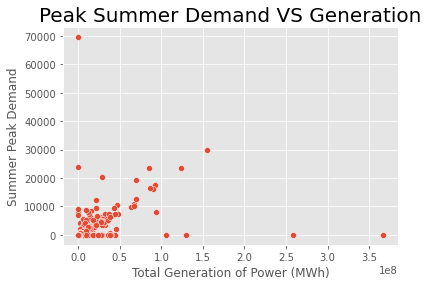

In [25]:
sum_demand_gen = df[['Demand.SummerPeak','Sources.Total']]
sum_demand_gen = sum_demand_gen.rename(columns={'Sources.Total': 'Total Generation of Power (MWh)', 'Demand.SummerPeak':'Summer Peak Demand'})
fig3 = sns.scatterplot(data = sum_demand_gen, y = 'Summer Peak Demand' ,x = 'Total Generation of Power (MWh)')
fig3.axes.set_title('Peak Summer Demand VS Generation', fontsize = 20)
fig3
if (downloadPic):
    plt.savefig ('Figure/peakDemandSumVsGen.png') # not now

### Peak Demand (Winter) vs. Generation

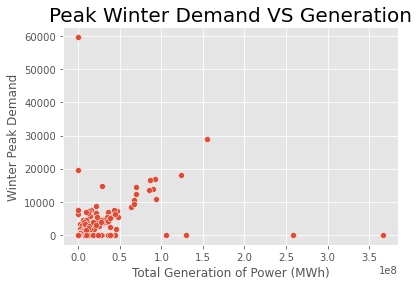

In [26]:
win_demand_gen = df[['Demand.WinterPeak','Sources.Total']]
win_demand_gen = win_demand_gen.rename(columns={'Sources.Total': 'Total Generation of Power (MWh)', 'Demand.WinterPeak':'Winter Peak Demand'})
fig3 = sns.scatterplot(data = win_demand_gen, y = 'Winter Peak Demand' ,x = 'Total Generation of Power (MWh)')
fig3.axes.set_title('Peak Winter Demand VS Generation', fontsize = 20)
fig3
if (downloadPic):
    plt.savefig ('Figure/peakDemandWinVsGen.png') # not now

### Similarities between power generated and revenue

In [27]:
df_temp = pd.merge(pwr_generated_tot, revenue_tot)
df_temp.head(5)

,Utility by State,Total Generation of Power (MWh),Total Revenue (Thousand of US dollars)
0,AK,6916431.0,1161028.7
1,AL,94490013.0,8828196.5
2,AR,55715570.0,4116630.9
3,AZ,96248652.0,9075302.1
4,CA,324458359.0,43229971.8


<AxesSubplot:>

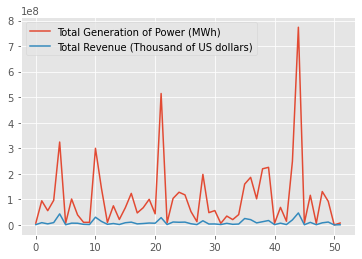

In [28]:
df_temp2 = df_temp.drop("Utility by State", axis = 1)
df_temp2.plot()

In [29]:
cosine_similarity(df_temp2.T)

array([[1.        , 0.94698827],
       [0.94698827, 1.        ]])

In [30]:
df_temp2.corr()

,Total Generation of Power (MWh),Total Revenue (Thousand of US dollars)
Total Generation of Power (MWh),1.00000,0.91485
Total Revenue (Thousand of US dollars),0.91485,1.00000


#### The correlation betweent the total power generated and the total revenue is 0.9148, which is high. Therefore, we can say the total revenue is strongly correlated to the total power generated, which makes sense since the more power generated, the more money it can potentially made.

### Similarities between power generated and use loss

In [31]:
df_temp = pd.merge(pwr_generated_tot, use_loss_tot)
df_temp.head(5)

,Utility by State,Total Generation of Power (MWh),Power losses of all kinds measured in megawatt hours
0,AK,6916431.0,357085.0
1,AL,94490013.0,4448349.0
2,AR,55715570.0,3068421.0
3,AZ,96248652.0,4303615.0
4,CA,324458359.0,14768014.0


<AxesSubplot:>

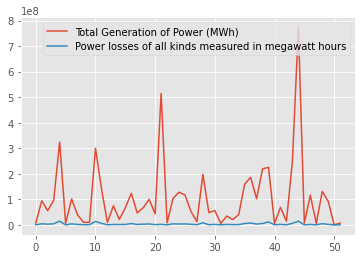

In [32]:
df_temp2 = df_temp.drop("Utility by State", axis = 1)
df_temp2.plot()

In [33]:
cosine_similarity(df_temp2.T)

array([[1.        , 0.86637819],
       [0.86637819, 1.        ]])

In [34]:
df_temp2.corr()

,Total Generation of Power (MWh),Power losses of all kinds measured in megawatt hours
Total Generation of Power (MWh),1.000000,0.776237
Power losses of all kinds measured in megawatt hours,0.776237,1.000000


#### The correlation betweent the total power generated and the total power loss is 0.0.7762, which is relatively high. Therefore, we can say the use loss is somehow correlated to the total power generated. Since the correlation is not that high, the reason might be some factory has more advanced machines that can prevent large power loss.

### Power purchased by state

In [35]:
pwr_purchased = df[['Sources.Purchased','Utility.State']].groupby('Utility.State').sum()
pwr_purchased.reset_index(inplace=True)
pwr_purchased = pwr_purchased.rename(columns={'Sources.Purchased': 'Power purchased (MWh)', 'Utility.State':'Utility by State'})
pwr_purchased.head(3)

,Utility by State,Power purchased (MWh)
0,AK,2079564.0
1,AL,33760953.0
2,AR,26631435.0


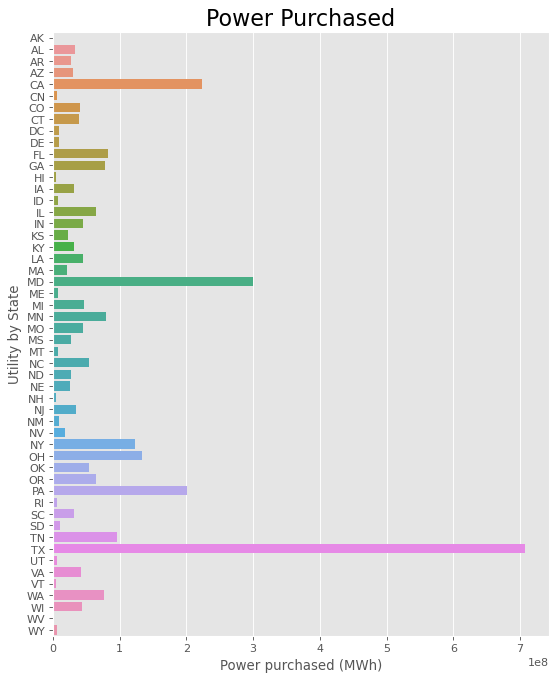

In [36]:
figure(figsize=(8, 10), dpi=80)
fig4 = sns.barplot(data = pwr_purchased, y='Utility by State', x='Power purchased (MWh)')
fig4.axes.set_title('Power Purchased', fontsize=20)
fig4
if (downloadPic):
    plt.savefig ('Figure/PowerPurchasedByState.png') # not now

In [37]:
pwr_purchased_and_total = df[['Sources.Total','Sources.Purchased','Utility.State']].groupby('Utility.State').sum()
pwr_purchased_and_total.reset_index(inplace=True)
pwr_purchased_and_total = pwr_purchased_and_total.rename(columns={'Sources.Total': 'Total Power(MWh)', 'Sources.Purchased': 'Power purchased (MWh)', 'Utility.State':'Utility by State'})
pwr_purchased_and_total.head(3)

,Utility by State,Total Power(MWh),Power purchased (MWh)
0,AK,6916431.0,2079564.0
1,AL,94490013.0,33760953.0
2,AR,55715570.0,26631435.0


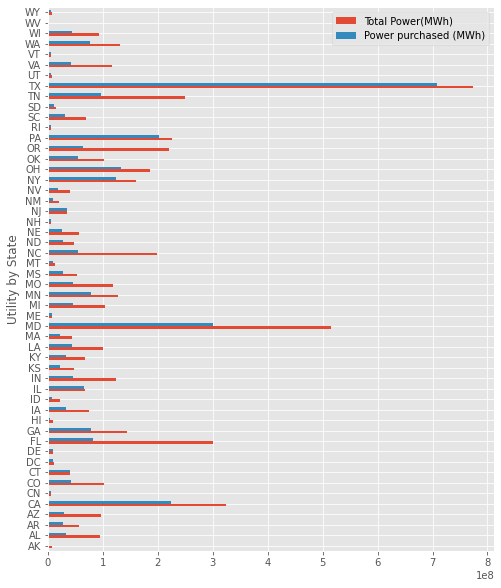

In [38]:
fig5 = pwr_purchased_and_total.plot.barh(y=['Total Power(MWh)','Power purchased (MWh)'], x='Utility by State',figsize=(8,10))
fig5
if (downloadPic):
    plt.savefig ('Figure/PowerTotalVsPurchased.png') # not now

In [39]:
pwr_purchased_and_total['Percentage of power purchased'] = pwr_purchased_and_total['Power purchased (MWh)']/pwr_purchased_and_total['Total Power(MWh)']
pwr_purchased_and_total.head(3)

,Utility by State,Total Power(MWh),Power purchased (MWh),Percentage of power purchased
0,AK,6916431.0,2079564.0,0.300670
1,AL,94490013.0,33760953.0,0.357297
2,AR,55715570.0,26631435.0,0.477989


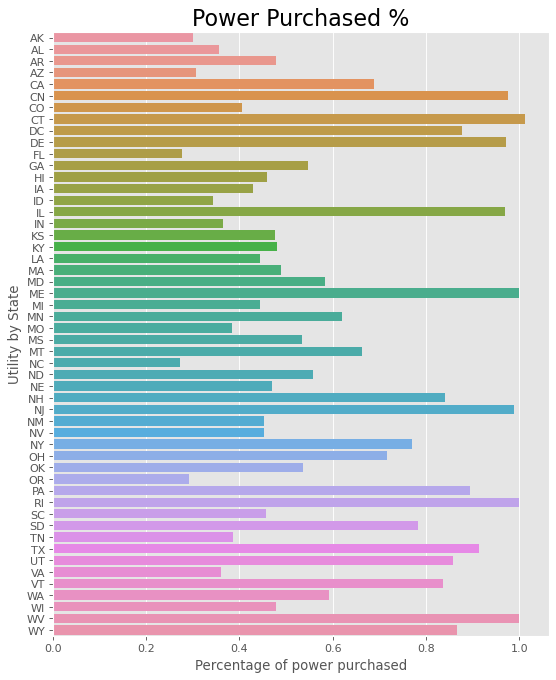

In [40]:
figure(figsize=(8, 10), dpi=80)
fig6 = sns.barplot(data = pwr_purchased_and_total, y='Utility by State', x='Percentage of power purchased')
fig6.axes.set_title('Power Purchased %', fontsize=20)
fig6
if (downloadPic):
    plt.savefig ('Figure/PowerPercentPurchased.png') # not now